In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
raw_data = np.loadtxt("/content/RecordSession_2021.11.22_13.24.37.csv", delimiter = ',')


# Labeling Data

In [144]:
total_data_len = len(raw_data[0])
total_rows = len(raw_data)
print(total_data_len)
print(total_rows)

31096
8


In [145]:
data = raw_data[:, 3000:total_data_len]

28096


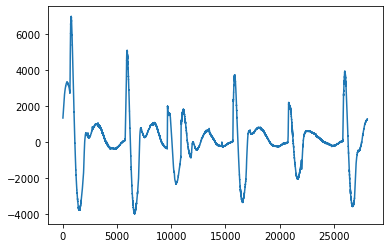

In [146]:
plt.plot(data[0])
cut_data_len = len(data[0])
print(cut_data_len)

# Seeing where the eye blinks happen

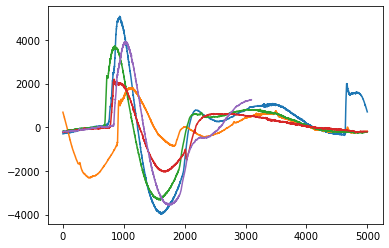

In [147]:
for i in range(10):
  plt.plot(data[0, 5000*(i+1):5000*(i+2)])

In [148]:
def plot_each_interval(row, start, end, interval):
  for i in range(10):
    #plt.figure(i)
    plt.plot(data[row, (start + i*interval):(end + i*interval)])
    #plt.ylim(-100, 200)
    #plt.xlim(0, 1308)
    plt.title("Interval " + str(i) +  ", Row " + str(row))
    

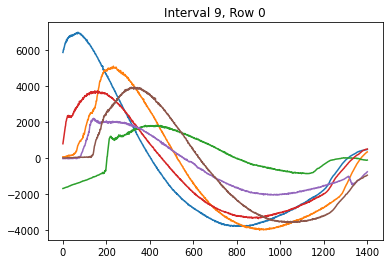

In [149]:
plot_each_interval(0, 700, 2100, 5000)

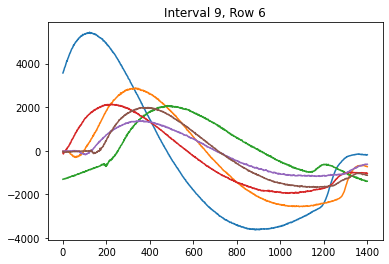

In [150]:
plot_each_interval(6, 700, 2100, 5000)

In [151]:
truths = np.zeros(cut_data_len)
print(truths)
print(len(truths))

[0. 0. 0. ... 0. 0. 0.]
28096


# Labeling truths based on when the blinks happen regularly

In [152]:
def fill_truths(start, end, interval):
  for i in range(6):
    for j in range(start + i*interval, end + i*interval):
      truths[j] = 1

In [153]:
fill_truths(700, 2100, 5000)

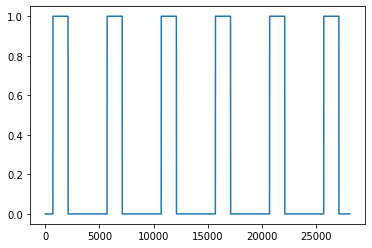

In [154]:
plt.plot(truths)

In [155]:
truths1 = [truths]
truth_data = np.append(data, truths1, axis=0)

In [156]:
print(truth_data)

[[1334.9  1344.3  1356.7  ... 1257.9  1263.6  1263.5 ]
 [1336.9  1344.1  1356.7  ... 2316.7  2318.2  2317.  ]
 [3429.5  3435.   3446.7  ...  363.22  368.26  371.12]
 ...
 [1144.9  1148.7  1153.6  ... 1179.8  1183.8  1185.9 ]
 [1185.5  1185.5  1189.2  ...  308.38  312.46  320.1 ]
 [   0.      0.      0.   ...    0.      0.      0.  ]]


9


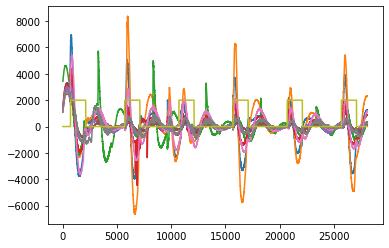

In [157]:
expanded_truths = truths*2000
expanded_truths1 = [expanded_truths]
expanded_truth_data = np.append(data, expanded_truths1, axis=0)
print(len(expanded_truth_data))
for i in range(len(expanded_truth_data)):
  plt.plot(expanded_truth_data[i])

# Visualizing Truths

The truths line up with orange and blue spikes, but other spikes (like green) happen at the opposite time.

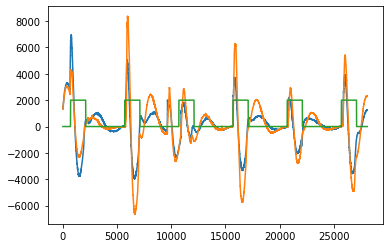

In [158]:
plt.plot(expanded_truth_data[0])
plt.plot(expanded_truth_data[1])
#plt.plot(expanded_truth_data[2]) # different from others
plt.plot(expanded_truth_data[8])

# Attempting to predict blinks using neural networks

In [159]:
# Classifier
truths_row = 8
pred_row = 0

In [160]:
print(len(truth_data[0]))

28096


In [161]:
print(truth_data[8])

[0. 0. 0. ... 0. 0. 0.]


In [162]:
# Transforming X data into kernel of a certain size


kernel_size = 200
kernel_movement = 50


new_X_length = int((len(truth_data[0]) - kernel_size)/kernel_movement)
print(new_X_length)

new_X = np.empty((0,kernel_size), int)
new_Y = np.zeros(new_X_length + 1)


#print(new_Y)
#print(new_X)


for i in range(new_X_length + 1):
  new_X_fragment = np.array([truth_data[pred_row, i*kernel_movement:i*kernel_movement+kernel_size]])
  #print(new_X_fragment)
  new_X = np.append(new_X, new_X_fragment, axis=0)
  y_average = int(np.average(truth_data[truths_row, i*kernel_movement:i*kernel_movement+kernel_size]))
  new_Y[i] = y_average

#print(new_X)
#print(new_Y)

split_cutoff = int(new_X_length/2)

557


In [163]:
# Predict on row 0

trainX = new_X[0:split_cutoff]
testX = new_X[split_cutoff:]

trainY = new_Y[0:split_cutoff]
testY = new_Y[split_cutoff:]


In [164]:
print(trainY)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [165]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Scale the training data!
scaler.fit(trainX)
scaled_trainX = scaler.transform(trainX)
scaled_testX = scaler.transform(testX)

#print("Variance: ", trainX.var(axis=0)) #every variance should be 1
#print("Mean: ", trainX.mean(axis=0)) #every mean should be 0 or very close to 0

In [166]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Initialize a neural network as described above
neural_net = MLPClassifier(hidden_layer_sizes = (5, 3), random_state = 1, max_iter = 300)
# 2 hidden layers of sizes 5 and 3.

In [167]:
neural_net.fit(scaled_trainX, trainY)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(5, 3), max_iter=300, random_state=1)

In [168]:
# Exercise:
# 1. Predict on the training data
trainY_pred = neural_net.predict(scaled_trainX)

# 2. Calculate the training accuracy
acc = metrics.accuracy_score(trainY, trainY_pred, normalize=True)
print(acc)

0.8884892086330936


In [169]:
print(trainY_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [170]:
print(trainY)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Truths and predictions are very aligned.

In [171]:
acc = metrics.accuracy_score(trainY, trainY_pred, normalize=True)
print(acc)

0.8884892086330936


In [172]:
testY_pred = neural_net.predict(scaled_testX)
acc = metrics.accuracy_score(testY, testY_pred, normalize=True)
print(acc)

0.9071428571428571


# Attempting to classify blinks in a more simple way based on if the spike is extreme enough

In [173]:

def simple_classifier(value):
  if np.logical_or(value > 3000, value < -1900):
    return 1
  return 0



In [174]:
simple_trainX = data[0]
simple_predictions = np.zeros(len(simple_trainX))


for i in range(len(simple_trainX)):
  curr = simple_trainX[i]
  simple_predictions[i] = simple_classifier(curr)

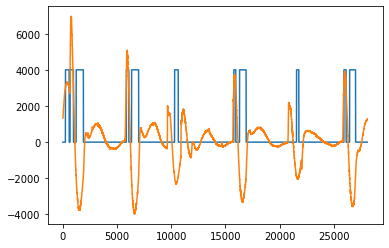

In [175]:
plt.plot(simple_predictions*4000)
plt.plot(data[0])

In [178]:
acc = metrics.accuracy_score(simple_predictions, truths, normalize=True)
print(acc)

0.8024273917995444


In [177]:
np.savetxt('truth_data_2437_eyeblink.csv', truth_data, delimiter=',')